In [268]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore") 

df = pd.read_csv('sales_data_sample.csv', encoding='latin')
le = LabelEncoder()

df["STATUS"] = le.fit_transform(df["STATUS"])

df.drop(['QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE','ORDERDATE','ORDERNUMBER','ORDERLINENUMBER'],axis=1,inplace=True)

scaler = StandardScaler()
x = scaler.fit_transform(df)

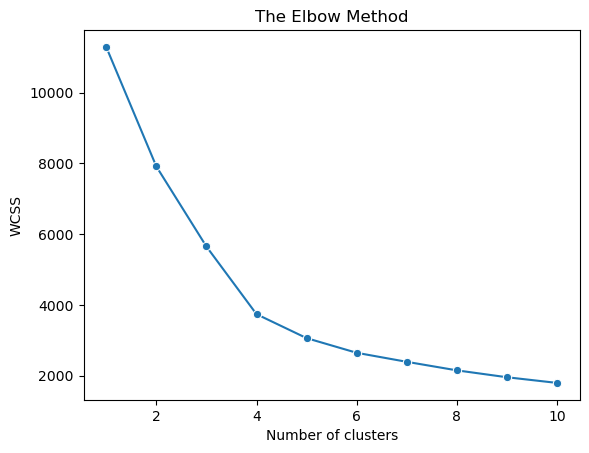

In [269]:
wcs = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i , random_state = 0,init='k-means++')
    kmeans.fit(x)
    wcs.append(kmeans.inertia_)

sns.lineplot(range(1,11),wcs,marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

In [272]:
kmeans = KMeans(n_clusters=4, random_state=0,init='k-means++')
df['Cluster'] = kmeans.fit_predict(x)
df.Cluster.unique()

array([3, 1, 0, 2])

In [273]:
ax = sns.scatterplot(x = 'QUANTITYORDERED', y = 'PRICEEACH', hue= 'Cluster', data = df, palette =['red', 'green', 'blue','yellow','purple'] )
# Centroids
centroids = kmeans.cluster_centers_
#centroids_scaled = scaler.inverse_transform(centroids)
plt.scatter(centroids_scaled[:, 0], centroids_scaled[:, 1], c='black', label='Centroids');

ValueError: The palette list has the wrong number of colors.